# Pymaceuticals Inc.

## Analysis/Observations
* The mice used in the study were pretty evenly distributed between female and male.
* There was a strong correlation between mouse weight and tumor volume, though the tumor itself could be attributing to the mouse weight measurement.
* Between 4 treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) there was only one outlier when looking at the average final tumor volume.


In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
results_df = pd.read_csv(study_results_path)
# Combine the data into a single dataset
df = mouse_df.merge(results_df, on='Mouse ID')
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df[df.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].iloc[0]
duplicate_mouse

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID'] == duplicate_mouse]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'] != duplicate_mouse]

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = clean_df.groupby('Drug Regimen')
vol = 'Tumor Volume (mm3)'
data = {
    'Mean Tumor Volume': drug_group[vol].mean().tolist(),
    'Median Tumor Volume': drug_group[vol].median().tolist(),
    'Tumor Volume Variance': drug_group[vol].var().tolist(),
    'Tumor Volume Std. Dev.': drug_group[vol].std().tolist(),
    'Tumor Volume Std. Err.': drug_group[vol].sem().tolist()
}
summary_df = pd.DataFrame(data, index=drug_group.groups.keys())
summary_df.index.name = 'Drug Regimen'
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = drug_group[vol].agg(['mean', 'median','var','std','sem'])
drug_agg.columns.name = 'Tumor Volume (mm3)'
drug_agg

Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

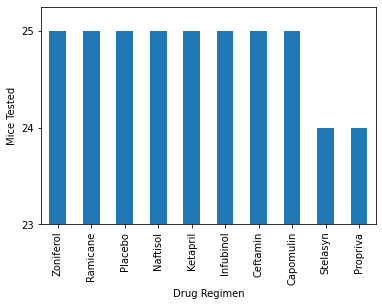

In [246]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_group['Mouse ID'].nunique().sort_values(ascending=False).plot.bar(ylim=(23,25.25), yticks=([23,24,25]), ylabel='Mice Tested');

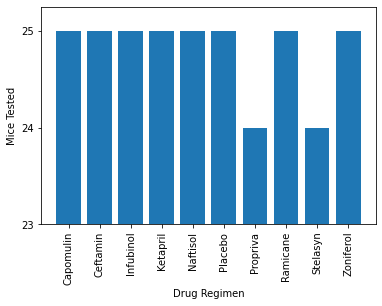

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x = drug_group.groups.keys()
y = drug_group['Mouse ID'].nunique().tolist()
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Tested')
plt.ylim(23,25.25)
plt.yticks([23,24,25]);

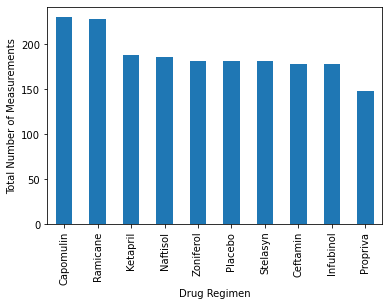

In [177]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group[vol].agg(['count']).sort_values(by='count', ascending=False).plot.bar(ylabel='Total Number of Measurements', legend=False);

Text(0, 0.5, 'Total Number of Measurements')

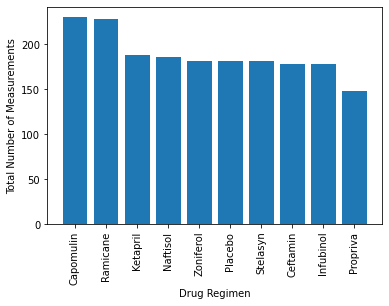

In [187]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
measure_counts_df = drug_group[vol].agg(['count']).sort_values(by='count', ascending=False)
x = measure_counts_df.index
y = measure_counts_df['count']
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')

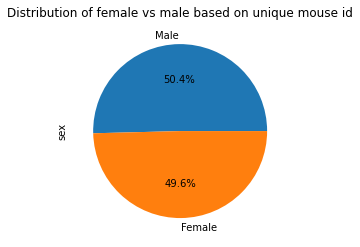

In [243]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = clean_df.groupby('Sex')['Mouse ID'].nunique().sort_values(ascending=False)
sex_group.plot.pie(ylabel='sex', autopct='%1.1f%%', title='Distribution of female vs male based on unique mouse id');

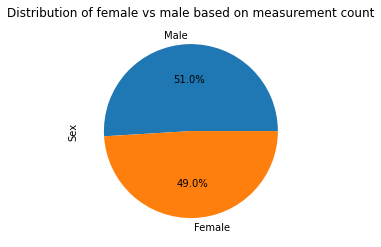

In [245]:
# Distribution of female vs male based on measurement count using pandas
clean_df.groupby('Sex').agg(['count']).iloc[:,0].sort_values(ascending=False).plot.pie(ylabel='Sex', autopct='%1.1f%%', title='Distribution of female vs male based on measurement count');

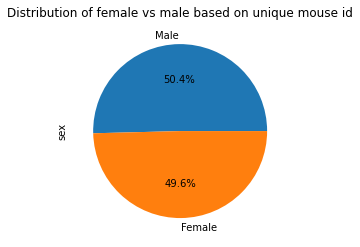

In [244]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = sex_group
plt.pie(x.tolist(), labels=x.keys(), autopct='%1.1f%%')
plt.title('Distribution of female vs male based on unique mouse id');
plt.ylabel('sex');

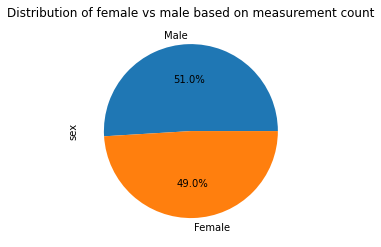

In [237]:
# Distribution of female vs male based on measurement count using pyplot
x = clean_df.groupby('Sex').agg(['count']).iloc[:,0].sort_values(ascending=False)
plt.pie(x.tolist(), labels=x.keys(),  autopct='%1.1f%%')
plt.title('Distribution of female vs male based on measurement count')
plt.ylabel('sex');

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_df = clean_df.groupby('Mouse ID')['Timepoint'].max().to_frame().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_vol_df = last_time_df.merge(clean_df[['Mouse ID','Timepoint','Drug Regimen','Tumor Volume (mm3)']], how='left', on=['Mouse ID', 'Timepoint']).set_index('Mouse ID')
final_vol_df.reset_index(inplace=True)
final_vol_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
243,z435,10,Propriva,48.710661
244,z578,45,Ramicane,30.638696
245,z581,45,Infubinol,62.754451
246,z795,45,Naftisol,65.741070


In [159]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for drug in treatments:
    tumor_vol_list = final_vol_df[final_vol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol_list)
    quartiles = tumor_vol_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_series = final_vol_df.loc[(final_vol_df['Drug Regimen'] == drug) & ((final_vol_df['Tumor Volume (mm3)'] < lower_bound) | (final_vol_df['Tumor Volume (mm3)'] > upper_bound))]['Tumor Volume (mm3)']
    print(f"{drug}'s potential outliers: {outlier_series}")
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


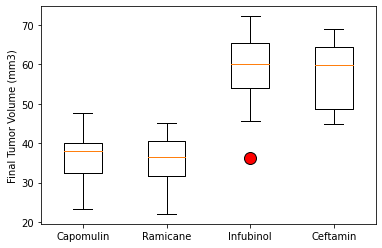

In [158]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='k')
ax1.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

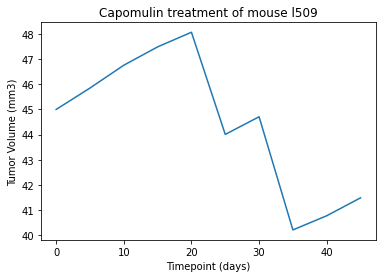

In [105]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_drug_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
one_mouse_df = one_drug_df.loc[one_drug_df['Mouse ID'] == 'l509']
mouse_ID = one_mouse_df['Mouse ID'].iloc[0]
first_mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)', ylabel='Tumor Volume (mm3)', xlabel='Timepoint (days)', title=f'Capomulin treatment of mouse {mouse_ID}', legend=None);


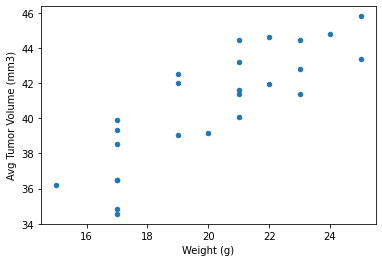

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_df = one_drug_df.groupby('Mouse ID').mean()[['Tumor Volume (mm3)']].reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})
weight_df = one_drug_df.groupby('Mouse ID').first()['Weight (g)'].reset_index()
weight_tumor_df = w_df.merge(weight, on='Mouse ID')
weight_tumor_df.plot.scatter(2,1);


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


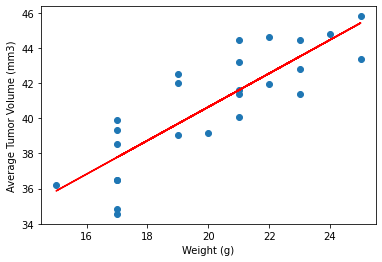

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weights = weight_tumor_df.iloc[:,2]
avg_volumes = weight_tumor_df.iloc[:,1]
v_slope, v_int, v_r, v_p, v_std_err = st.linregress(weights, avg_volumes)
v_fit = v_slope * weights + v_int
plt.scatter(weights,avg_volumes)
plt.plot(weights,v_fit,color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
correlation = st.pearsonr(weights,avg_volumes)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
